In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"C:\Users\sarav\Downloads\TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [3]:
df=data.reset_index()['Close']
df

0        44.722000
1        44.647999
2        44.702000
3        45.000000
4        44.585999
           ...    
1253    713.760010
1254    709.989990
1255    707.820007
1256    722.250000
1257    717.169983
Name: Close, Length: 1258, dtype: float64

In [4]:
#df=data[['Date','Close']]
#df.shape

In [5]:
df

0        44.722000
1        44.647999
2        44.702000
3        45.000000
4        44.585999
           ...    
1253    713.760010
1254    709.989990
1255    707.820007
1256    722.250000
1257    717.169983
Name: Close, Length: 1258, dtype: float64

In [6]:
#df = df[df['Date'] > '2020-08-01']
#close_stock = df.copy()
#print("Total data for prediction: ",df.shape[0])

In [7]:
#df.columns

In [8]:
#df=df.drop(['level_0', 'index', 'Date'],axis=1)
#df.head()

In [9]:
#df.shape

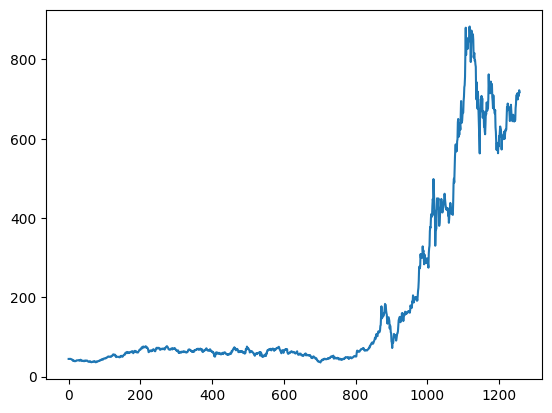

In [10]:
plt.plot(df)
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [12]:
df.shape

(1258, 1)

In [13]:
train_set=int(len(df)*0.6)
test_set=len(df)-train_set
train_data,test_data=df[0:train_set,:],df[train_set:len(df):1]

In [14]:
train_set,test_set

(754, 504)

In [15]:
def meth(data,timeset=1):
    X,y=[],[]
    for i in range(len(data)-timeset-1):
        a=data[i:(i+timeset),0]
        X.append(a)
        y.append(data[i+timeset,0])
    return np.array(X),np.array(y)

In [16]:
timeset=75
X_train,y_train=meth(train_data,timeset)
X_test,y_test=meth(test_data,timeset)

In [17]:
X_test.shape

(428, 75)

In [18]:
X_train.shape

(678, 75)

In [19]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM,Dropout
import tensorflow

In [21]:
tensorflow.keras.backend.clear_session()
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(timeset,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.20))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 75, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 75, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 14s 392ms/step - loss: 2.3780e-04 - val_loss: 0.1887
Epoch 2/100
11/11 [==============================] - 2s 176ms/step - loss: 1.0787e-04 - val_loss: 0.1699
Epoch 3/100
11/11 [==============================] - 2s 164ms/step - loss: 8.5572e-05 - val_loss: 0.1224
Epoch 4/100
11/11 [==============================] - 2s 163ms/step - loss: 6.3128e-05 - val_loss: 0.0528
Epoch 5/100
11/11 [==============================] - 2s 162ms/step - loss: 4.2016e-05 - val_loss: 0.0117
Epoch 6/100
11/11 [==============================] - 2s 165ms/step - loss: 4.0782e-05 - val_loss: 0.0230
Epoch 7/100
11/11 [==============================] - 2s 163ms/step - loss: 3.6599e-05 - val_loss: 0.0272
Epoch 8/100
11/11 [==============================] - 2s 164ms/step - loss: 3.6708e-05 - val_loss: 0.0156
Epoch 9/100
11/11 [==============================] - 2s 163ms/step - loss: 3.4027e-05 - val_loss: 0.0139
Epoch 10/100
11/11 [==============================] - 

In [24]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

14/14 [==============================] - 1s 41ms/step


In [25]:
train_pred=scaler.inverse_transform(train_pred)
test_pred=scaler.inverse_transform(test_pred)

In [26]:
y_train=scaler.inverse_transform(y_train.reshape(-1,1))
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

In [27]:
import math
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error

In [28]:
mse_tr=math.sqrt(mean_squared_error(y_train,train_pred))
mse_tr

2.527105504564629

In [29]:
mse_tt=math.sqrt(mean_squared_error(y_test,test_pred))
mse_tt

51.54745142826697

In [30]:
print("Train data R2 score:", r2_score(y_train, train_pred))
print("Test data R2 score:", r2_score(y_test, test_pred))

Train data R2 score: 0.9251130373105602
Test data R2 score: 0.9574566275173043


In [31]:
len(df),len(train_pred)

(1258, 678)

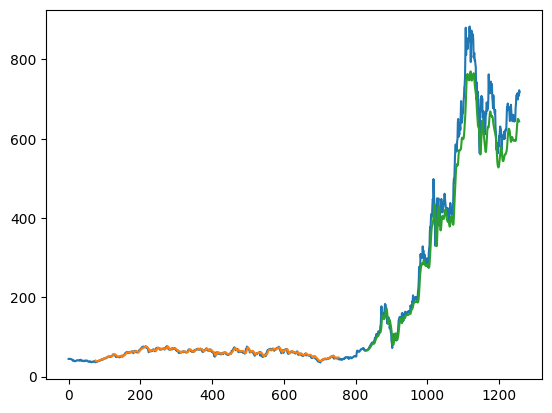

In [32]:
settin=75
tr_pred_plot=np.empty_like(df)## to create a new array with the same shape and type as a given array
tr_pred_plot[:,:]=np.nan## fill all with nan values
tr_pred_plot[settin:len(train_pred)+settin,:]=train_pred

tt_pred_plot=np.empty_like(df)
tt_pred_plot[:,:]=np.nan
tt_pred_plot[len(train_pred)+(settin*2)+1:len(df)-1,:]=test_pred

plt.plot(scaler.inverse_transform(df))
plt.plot(tr_pred_plot)
plt.plot(tt_pred_plot)
plt.show()

In [33]:
print("Train data MAPE: ", mean_absolute_percentage_error(y_train,train_pred))
print("-------------------------------------------------------------------------------------")
print("Test data MAPE: ", mean_absolute_percentage_error(y_test,test_pred))

Train data MAPE:  0.03238596853605408
-------------------------------------------------------------------------------------
Test data MAPE:  0.08579096755569056


In [34]:
x_input=test_data[len(test_data)-timeset:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=timeset
i=0
days = 30
while(i<days):
    
    if(len(temp_input)>timeset):
        
        x_input=np.array(temp_input[1:])
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
               
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [35]:
new=np.arange(1,timeset+1)
pred=np.arange(timeset+1,timeset+days+1)

In [36]:
df1=df.tolist()
df1.extend(lst_output)

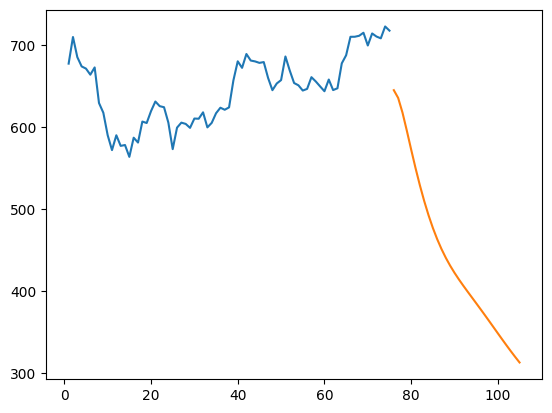

In [37]:
plt.plot(new,scaler.inverse_transform(df[1183:]))
plt.plot(pred,scaler.inverse_transform(lst_output))

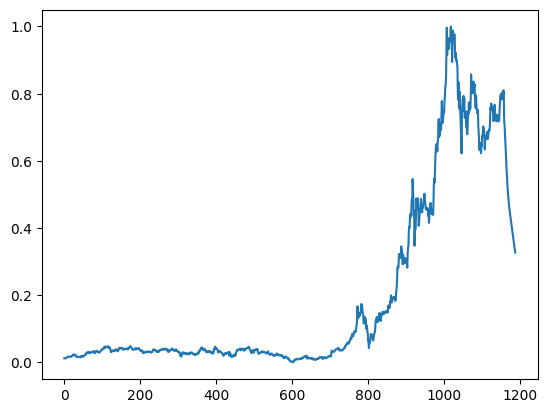

In [38]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[100:])

Gated Recurrent Units (GRU)

In [39]:
from tensorflow.keras.layers import GRU

In [40]:
timeset1=50
X_train,y_train=meth(train_data,timeset1)
X_test,y_test=meth(test_data,timeset1)

In [41]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [42]:
tensorflow.keras.backend.clear_session()
model1=Sequential()
model1.add(GRU(30,return_sequences=True,input_shape=(timeset1,1)))
model1.add(GRU(30,return_sequences=True))
model1.add(GRU(30))
model1.add(Dropout(0.20))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [43]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
22/22 [==============================] - 13s 157ms/step - loss: 2.1843e-04 - val_loss: 0.1535
Epoch 2/100
22/22 [==============================] - 2s 72ms/step - loss: 7.2628e-05 - val_loss: 0.0394
Epoch 3/100
22/22 [==============================] - 2s 70ms/step - loss: 3.2043e-05 - val_loss: 0.0026
Epoch 4/100
22/22 [==============================] - 2s 70ms/step - loss: 2.4452e-05 - val_loss: 0.0058
Epoch 5/100
22/22 [==============================] - 2s 79ms/step - loss: 2.6223e-05 - val_loss: 0.0063
Epoch 6/100
22/22 [==============================] - 2s 77ms/step - loss: 2.5698e-05 - val_loss: 0.0060
Epoch 7/100
22/22 [==============================] - 2s 70ms/step - loss: 2.3608e-05 - val_loss: 0.0050
Epoch 8/100
22/22 [==============================] - 2s 70ms/step - loss: 2.1817e-05 - val_loss: 0.0046
Epoch 9/100
22/22 [==============================] - 2s 73ms/step - loss: 1.9463e-05 - val_loss: 0.0056
Epoch 10/100
22/22 [==============================] - 2s 71ms/

In [44]:
train_pred1=model1.predict(X_train)
test_pred1=model1.predict(X_test)

15/15 [==============================] - 0s 18ms/step


In [45]:
train_pred1=scaler.inverse_transform(train_pred1)
test_pred1=scaler.inverse_transform(test_pred1)
y_train=scaler.inverse_transform(y_train.reshape(-1,1))
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

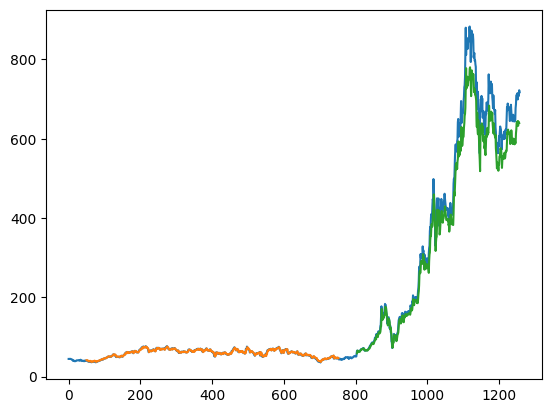

In [46]:
settin=50
tr_pred_plot=np.empty_like(df)## to create a new array with the same shape and type as a given array
tr_pred_plot[:,:]=np.nan## fill all with nan values
tr_pred_plot[settin:len(train_pred1)+settin,:]=train_pred1

tt_pred_plot=np.empty_like(df)
tt_pred_plot[:,:]=np.nan
tt_pred_plot[len(train_pred1)+(settin*2)+1:len(df)-1,:]=test_pred1

plt.plot(scaler.inverse_transform(df))
plt.plot(tr_pred_plot)
plt.plot(tt_pred_plot)
plt.show()

In [47]:
print("Train data MAPE: ", mean_absolute_percentage_error(y_train,train_pred1))
print("-------------------------------------------------------------------------------------")
print("Test data MAPE: ", mean_absolute_percentage_error(y_test,test_pred1))

Train data MAPE:  0.022371463962465983
-------------------------------------------------------------------------------------
Test data MAPE:  0.07103318440244959


In [48]:
x_input1=test_data[len(test_data)-timeset1:].reshape(1,-1)
temp_input1=list(x_input1)
temp_input1=temp_input1[0].tolist()

from numpy import array

lst_output1=[]
n_steps=timeset1
i=0
days = 30
while(i<days):
    
    if(len(temp_input1)>timeset1):
        
        x_input1=np.array(temp_input1[1:])
        x_input1 = x_input1.reshape(1,-1)
        x_input1 = x_input1.reshape((1, n_steps, 1))
        
        yhat = model1.predict(x_input1, verbose=0)
        temp_input1.extend(yhat[0].tolist())
        temp_input1=temp_input1[1:]
               
        lst_output1.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input1 = x_input1.reshape((1, n_steps,1))
        yhat = model1.predict(x_input1, verbose=0)
        temp_input1.extend(yhat[0].tolist())
        lst_output1.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output1))

Output of predicted next days:  30


In [49]:
new1=np.arange(1,timeset1+1)
pred1=np.arange(timeset1+1,timeset1+days+1)

In [50]:
df2=df.tolist()
df2.extend(lst_output1)

In [51]:
df.shape

(1258, 1)

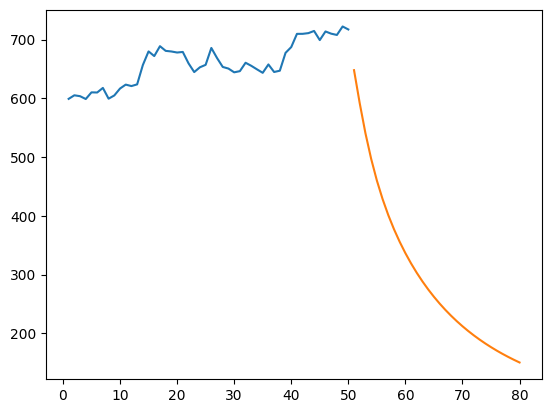

In [52]:
plt.plot(new1,scaler.inverse_transform(df[1208:]))
plt.plot(pred1,scaler.inverse_transform(lst_output1))

In [113]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [136]:
dta=data[['Date','Close']]

In [137]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Close   1258 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.8+ KB


In [138]:
dta.head()

,Date,Close
0,2016-08-16,44.722000
1,2016-08-17,44.647999
2,2016-08-18,44.702000
3,2016-08-19,45.000000
4,2016-08-22,44.585999


<AxesSubplot: >

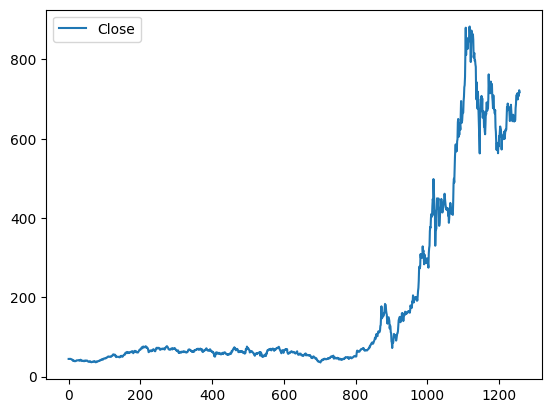

In [139]:
dta.plot()

C:\Users\sarav\AppData\Local\Temp\ipykernel_14212\3214491947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['Close']=np.log(dta['Close'])


<AxesSubplot: >

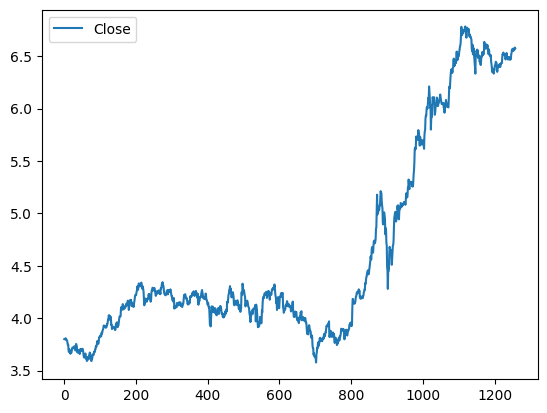

In [140]:
dta['Close']=np.log(dta['Close'])
dta.plot()

In [141]:
filtr = (dta.index < len(dta)-500)
df_train = dta[filtr].copy()
df_test = dta[~filtr].copy()

In [142]:
df_train.shape,df_test.shape

((758, 2), (500, 2))

In [143]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


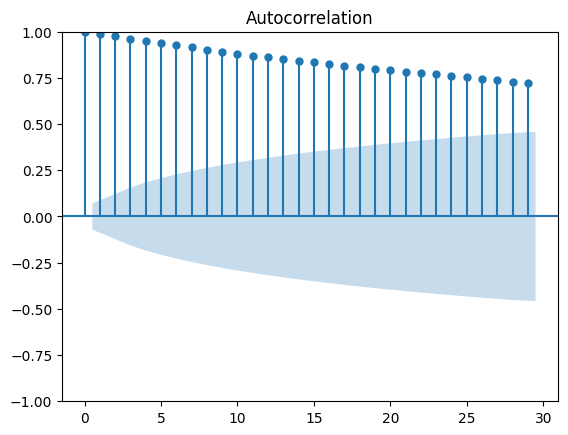

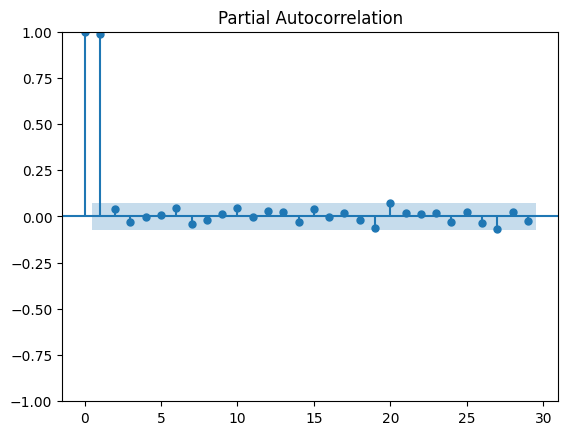

In [144]:
acf_original = plot_acf(df_train['Close'])
pacf_original = plot_pacf(df_train['Close'])

In [145]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train['Close'])
print(f'p value: {adf_test[1]}')

p value: 0.2513566977488637


Since the p value is greater than 0.05, it fails to reject the null hypothesis,thus it is not stationary

<AxesSubplot: >

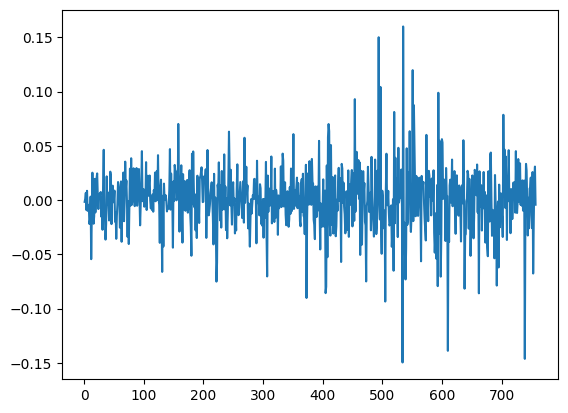

In [148]:
### to make the time series stationary we do differencing
diff_train = df_train['Close'].diff().dropna()
diff_train.plot()

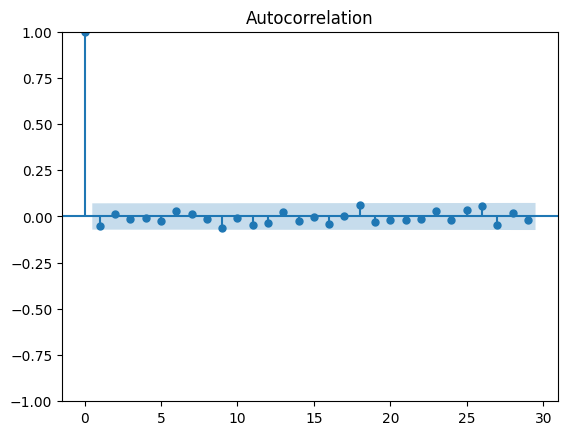

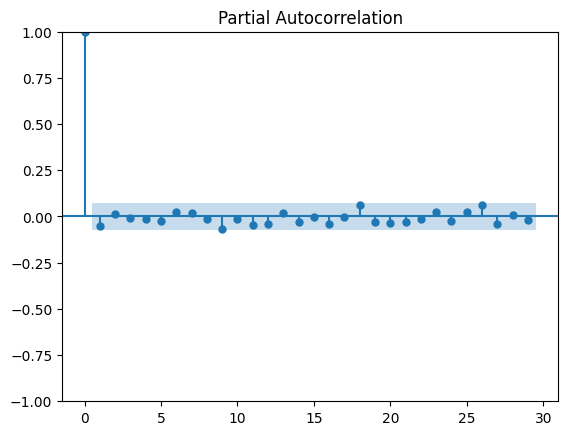

In [150]:
acf_diff = plot_acf(diff_train)
pacf_diff = plot_pacf(diff_train)

In [151]:
adf_test = adfuller(diff_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.0


We can reject the null hypothesis so the time series is Stationary.

In [159]:
from statsmodels.tsa.arima.model import ARIMA
model0 = ARIMA(diff_train, order=(0,0,0))
model_fit = model0.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  757
Model:                          ARIMA   Log Likelihood                1596.203
Date:                Sun, 25 Dec 2022   AIC                          -3188.405
Time:                        10:18:22   BIC                          -3179.146
Sample:                             0   HQIC                         -3184.839
                                - 757                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.223e-06      0.001      0.008      0.994      -0.002       0.002
sigma2         0.0009   2.42e-05     35.660      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   1.90   Jarque-

c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\sarav\AppData\Local\Temp\ipykernel_14212\2563957054.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  residuals = model_fit.resid[1:]


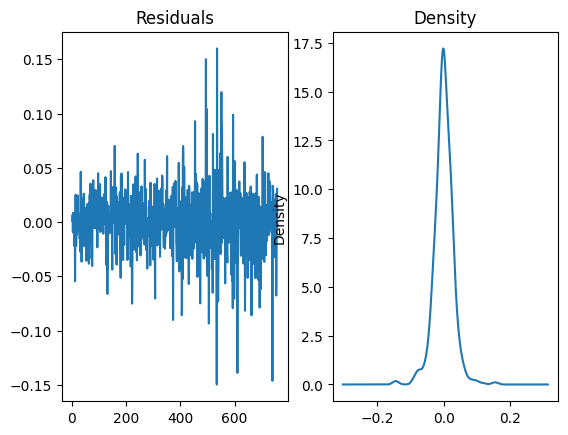

In [160]:
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


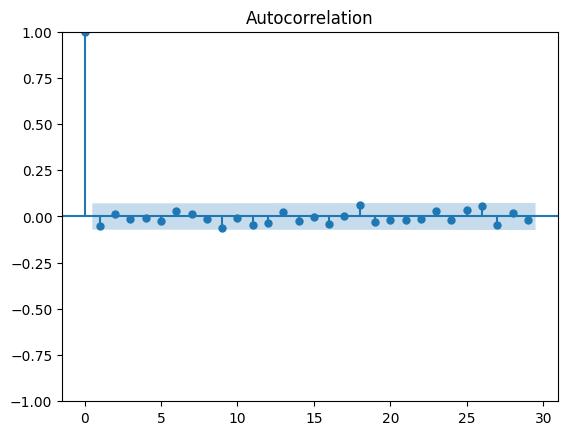

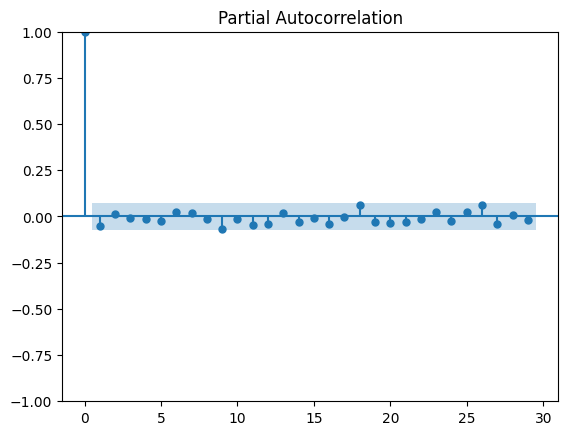

In [161]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

In [164]:
dta.info

<bound method DataFrame.info of             Date     Close  forecast_manual
0     2016-08-16  3.800466              NaN
1     2016-08-17  3.798809              NaN
2     2016-08-18  3.800018              NaN
3     2016-08-19  3.806662              NaN
4     2016-08-22  3.797420              NaN
...          ...       ...              ...
1253  2021-08-09  6.570547         0.000008
1254  2021-08-10  6.565251         0.000008
1255  2021-08-11  6.562190         0.000008
1256  2021-08-12  6.582371         0.000008
1257  2021-08-13  6.575313         0.000008

[1258 rows x 3 columns]>

c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sarav\AppData\Local\Temp\ipykernel_14212\3991829941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dta['forecast_manual'] = [None]*len(df_train) + list(forecast_test)


<AxesSubplot: >

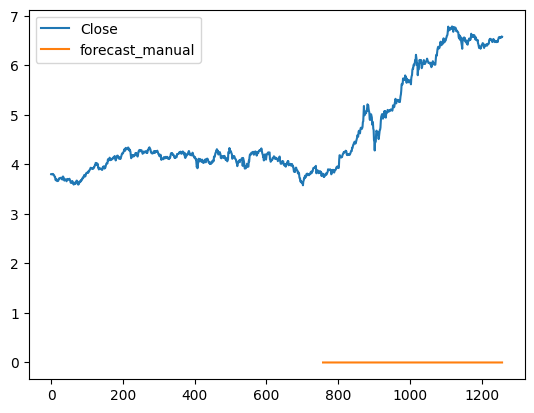

In [163]:
forecast_test = model_fit.forecast(len(df_test['Close']))
dta['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
dta.plot()

In [157]:
df_test

,Date,Close,Predictions
758,2019-08-21,3.787955,2.259327e-04
759,2019-08-22,3.793915,1.025219e-07
760,2019-08-23,3.744314,1.140697e-05
761,2019-08-26,3.761200,1.084110e-05
762,2019-08-27,3.756912,1.086943e-05
...,...,...,...
1253,2021-08-09,6.570547,1.086808e-05
1254,2021-08-10,6.565251,1.086808e-05
1255,2021-08-11,6.562190,1.086808e-05
1256,2021-08-12,6.582371,1.086808e-05


In [132]:
dta

0       3.800466
1       3.798809
2       3.800018
3       3.806662
4       3.797420
          ...   
1253    6.570547
1254    6.565251
1255    6.562190
1256    6.582371
1257    6.575313
Name: Close, Length: 1258, dtype: float64